In [1]:
# Set up and load data
# Includes
import sys
import os
import numpy as np
import json

# Import fig stuff
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


# Setup paths containing utility
curr_folder = os.getcwd()
sys.path.insert(0, os.path.join(curr_folder,'../app'))

# Import utils
from utils_EDA import p_list_qas
from utils import load_SQuAD_train
from utils import load_SQuAD_dev
from utils_EDAplots import plotbar_train_dev,plothist_train_dev

# Load the training data
arts_train = load_SQuAD_train()

# Load the testing data
arts_dev = load_SQuAD_dev()



In [2]:
# All articles
Ntrain = len(arts_train)
Ndev = len(arts_dev)
print ("Narticles in train = " +  str(len(arts_train))) 
print ("Narticles in dev = " +  str(len(arts_dev))) 

Narticles in train = 442
Narticles in dev = 35


In [3]:
# Merge arts together
arts= arts_train + arts_dev
Narticles = len(arts)
print ("Narticles total = " +  str(len(arts))) 

Narticles total = 477


In [4]:
arts_dev[0]['paragraphs'][0]['context']

'The Normans (Norman: Nourmands; French: Normands; Latin: Normanni) were the people who in the 10th and 11th centuries gave their name to Normandy, a region in France. They were descended from Norse ("Norman" comes from "Norseman") raiders and pirates from Denmark, Iceland and Norway who, under their leader Rollo, agreed to swear fealty to King Charles III of West Francia. Through generations of assimilation and mixing with the native Frankish and Roman-Gaulish populations, their descendants would gradually merge with the Carolingian-based cultures of West Francia. The distinct cultural and ethnic identity of the Normans emerged initially in the first half of the 10th century, and it continued to evolve over the succeeding centuries.'

In [5]:
print([arts_dev[0]['paragraphs'][0]['qas']])

[[{'question': 'In what country is Normandy located?', 'id': '56ddde6b9a695914005b9628', 'answers': [{'text': 'France', 'answer_start': 159}, {'text': 'France', 'answer_start': 159}, {'text': 'France', 'answer_start': 159}, {'text': 'France', 'answer_start': 159}], 'is_impossible': False}, {'question': 'When were the Normans in Normandy?', 'id': '56ddde6b9a695914005b9629', 'answers': [{'text': '10th and 11th centuries', 'answer_start': 94}, {'text': 'in the 10th and 11th centuries', 'answer_start': 87}, {'text': '10th and 11th centuries', 'answer_start': 94}, {'text': '10th and 11th centuries', 'answer_start': 94}], 'is_impossible': False}, {'question': 'From which countries did the Norse originate?', 'id': '56ddde6b9a695914005b962a', 'answers': [{'text': 'Denmark, Iceland and Norway', 'answer_start': 256}, {'text': 'Denmark, Iceland and Norway', 'answer_start': 256}, {'text': 'Denmark, Iceland and Norway', 'answer_start': 256}, {'text': 'Denmark, Iceland and Norway', 'answer_start': 2

In [6]:

arts[0]['paragraphs'][0]['qas'][0]['answers']
arts[0]['paragraphs'][0]['qas'][0]['is_impossible']

False

In [7]:
context = arts[0]['paragraphs'][0]['context']
print(context)

Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) is an American singer, songwriter, record producer and actress. Born and raised in Houston, Texas, she performed in various singing and dancing competitions as a child, and rose to fame in the late 1990s as lead singer of R&B girl-group Destiny's Child. Managed by her father, Mathew Knowles, the group became one of the world's best-selling girl groups of all time. Their hiatus saw the release of Beyoncé's debut album, Dangerously in Love (2003), which established her as a solo artist worldwide, earned five Grammy Awards and featured the Billboard Hot 100 number-one singles "Crazy in Love" and "Baby Boy".


In [8]:
art = arts[:]
# for a in art:
#     for p in a['paragraphs']:
#         print(p['context'] + '\n')

# Do some basic plots of article stats only

## Words per paragraph

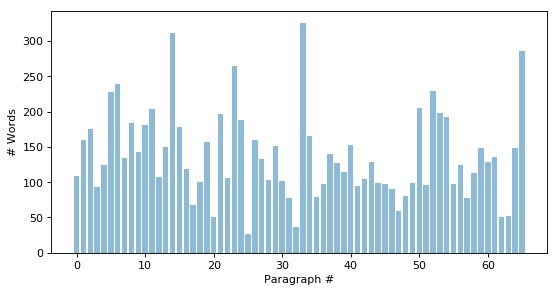

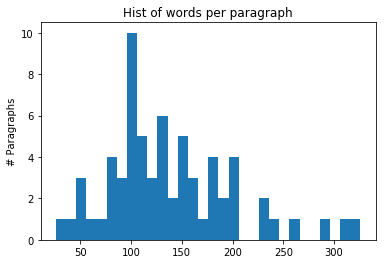

In [9]:
# Words per paragraph
a = art[0]
pwords = [len(p['context'].split()) for p in a['paragraphs']]

figure(num=None, figsize=(8, 4), dpi=80, facecolor='w', edgecolor='k')
plt.bar(range(len(pwords)), pwords, align='center', alpha=0.5)
plt.xlabel('Paragraph #')
plt.ylabel('# Words')
plt.show()

plt.hist(pwords, bins=30)  # arguments are passed to np.histogram
plt.title("Hist of words per paragraph")
plt.ylabel('# Paragraphs')
plt.show()



## Words per article

In [10]:

awords = []
for a in art:
    pwords = [len(p['context'].split()) for p in a['paragraphs']]
    awords.append(sum(pwords))


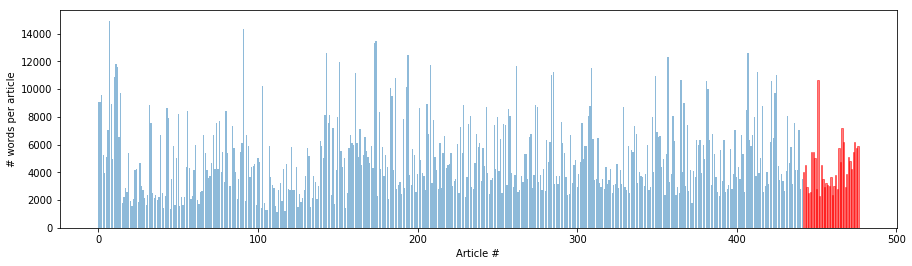

In [11]:

myvar = awords
varname = '# words'

# Plot bargraph
plotbar_train_dev(myvar,Ntrain,Ndev,varname,xlabel='Article #')

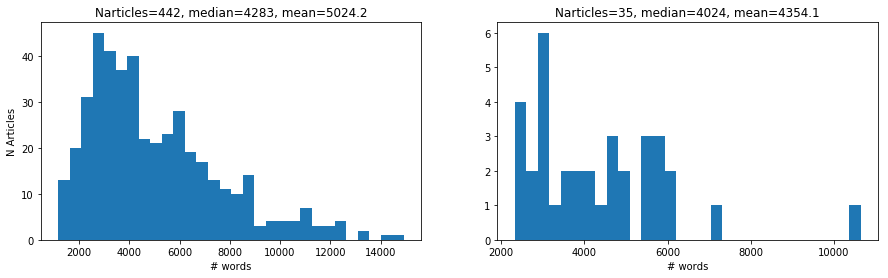

In [12]:

# Plot histogram
plothist_train_dev(myvar,Ntrain,Ndev,varname,ylabel='N Articles')

Print words per article

In [10]:
awords = []
for a in art:
    pwords = [len(p['context'].split()) for p in a['paragraphs']]
    awords.append(sum(pwords))
    
for i,awords in enumerate(awords):
    print("Article # " + str(i) + ": " + art[i]['title'] + ', ' + str(awords) + " words.")

Article # 0: Beyoncé, 9099 words.
Article # 1: Frédéric_Chopin, 9050 words.
Article # 2: Sino-Tibetan_relations_during_the_Ming_dynasty, 9591 words.
Article # 3: IPod, 5236 words.
Article # 4: The_Legend_of_Zelda:_Twilight_Princess, 3966 words.
Article # 5: Spectre_(2015_film), 5113 words.
Article # 6: 2008_Sichuan_earthquake, 7037 words.
Article # 7: New_York_City, 14934 words.
Article # 8: To_Kill_a_Mockingbird, 8908 words.
Article # 9: Solar_energy, 4938 words.
Article # 10: Kanye_West, 10883 words.
Article # 11: Buddhism, 11834 words.
Article # 12: American_Idol, 11605 words.
Article # 13: Dog, 6557 words.
Article # 14: 2008_Summer_Olympics_torch_relay, 9754 words.
Article # 15: Genome, 1771 words.
Article # 16: Comprehensive_school, 2247 words.
Article # 17: Republic_of_the_Congo, 2879 words.
Article # 18: Prime_minister, 2578 words.
Article # 19: Institute_of_technology, 5388 words.
Article # 20: Wayback_Machine, 1908 words.
Article # 21: Dutch_Republic, 1565 words.
Article # 22:

## Sentences per article

In [13]:
# Number of sentences per article
from nltk.tokenize import sent_tokenize

asentences = []
for a in art:
    psentences = [len(sent_tokenize(p['context'])) for p in a['paragraphs']]
    asentences.append(sum(psentences))

 

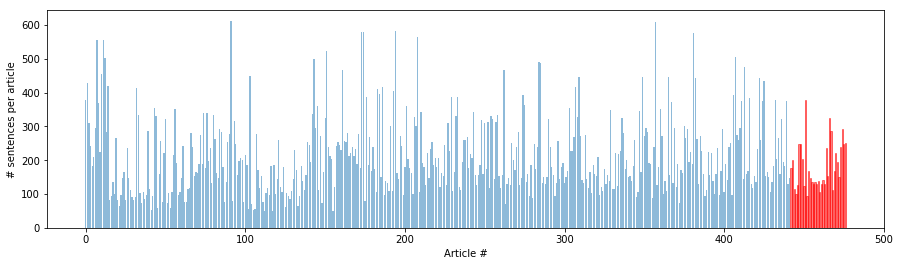

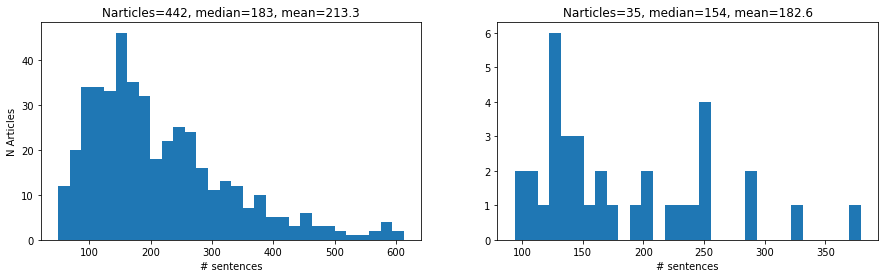

In [14]:

myvar = asentences
varname = '# sentences'

# Plot bargraph
plotbar_train_dev(myvar,Ntrain,Ndev,varname,xlabel='Article #')


# Plot histogram
plothist_train_dev(myvar,Ntrain,Ndev,varname,ylabel='N Articles')

In [19]:
# Total number of sentences in dataset
import statistics
Nsent_train = statistics.mean(myvar[0:Ntrain-1])* Ntrain
Nsent_dev = statistics.mean(myvar[Ntrain:]) *Ndev
print("Nsent_train={}, Nsent_dev={},Nsent_tot={}".format(Nsent_train,Nsent_dev,Nsent_train+Nsent_dev))

Nsent_train=94291.32879818595, Nsent_dev=6392.0,Nsent_tot=100683.32879818595


## Questions per article

In [21]:
arts[0]['paragraphs'][0]['qas'][0]['answers'][0]

{'text': 'in the late 1990s', 'answer_start': 269}

In [22]:
aquestions = []
for a in art:
    pquestions = [len(p['qas']) for p in a['paragraphs']]
    aquestions.append(sum(pquestions))
    

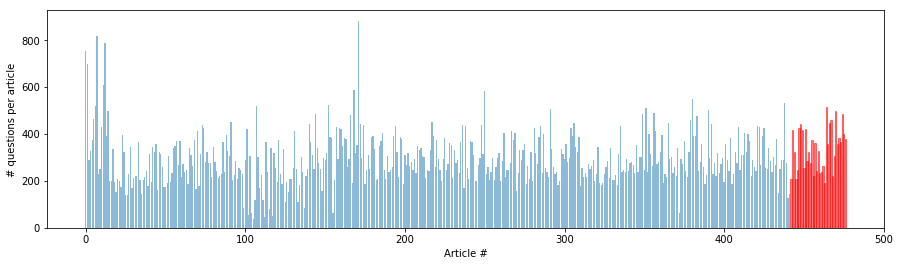

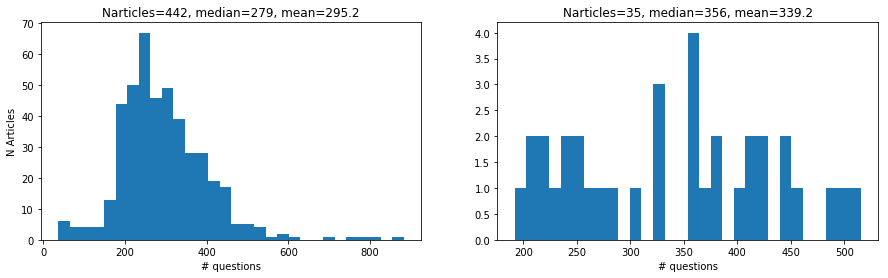

In [23]:
myvar = aquestions
varname = '# questions'

# Plot bargraph
plotbar_train_dev(myvar,Ntrain,Ndev,varname,xlabel='Article #')


# Plot histogram
plothist_train_dev(myvar,Ntrain,Ndev,varname,ylabel='N Articles')

## Answers per article

In [24]:
# import mpld3
# mpld3.enable_notebook()

aanswers = []
for a in art:
    qanswers = [len(q['answers']) for p in a['paragraphs'] for q in p['qas']]
    aanswers.append(sum(qanswers))

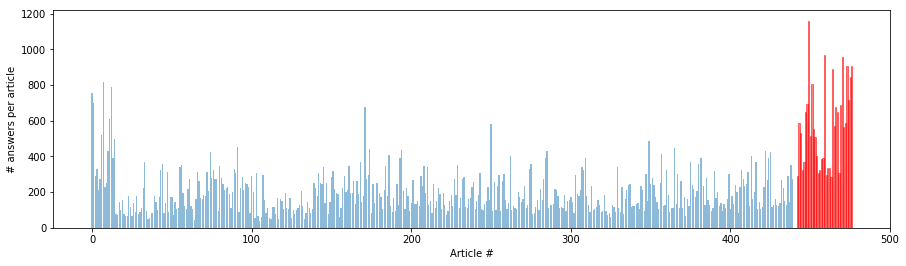

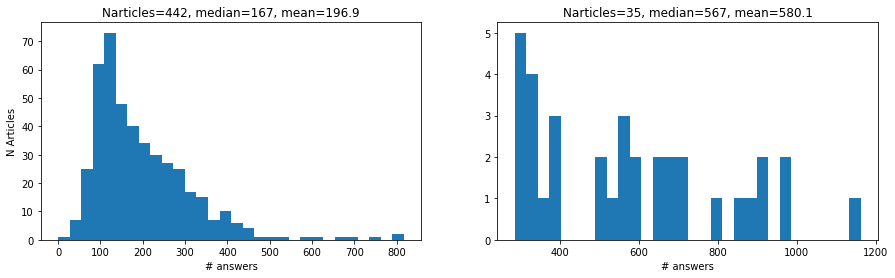

In [25]:
myvar = aanswers
varname = '# answers'

# Plot bargraph
plotbar_train_dev(myvar,Ntrain,Ndev,varname,xlabel='Article #')


# Plot histogram
plothist_train_dev(myvar,Ntrain,Ndev,varname,ylabel='N Articles')

## Words per answer

In [9]:
# import mpld3
# mpld3.enable_notebook()
art[0]['paragraphs'][0]['qas'][0]['answers'][0]
art[0]['paragraphs'][0]['qas'][0]['is_impossible']


False

In [10]:
from utils_NLP import extract_no_stopwords

a_wordsperanswer = []
for a in art:
    awords = [len(extract_no_stopwords(ans['text'].strip().split())) for p in a['paragraphs'] for q in p['qas'] for ans in q['answers'] if not q['is_impossible']]
    if len(awords) > 0:
        a_wordsperanswer.append(sum(awords)/len(awords))
    else:
        a_wordsperanswer.append(0)

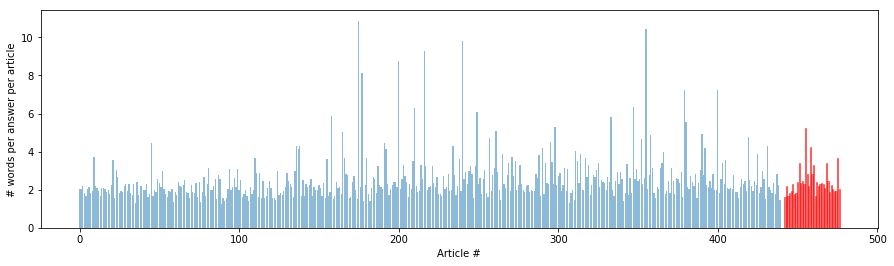

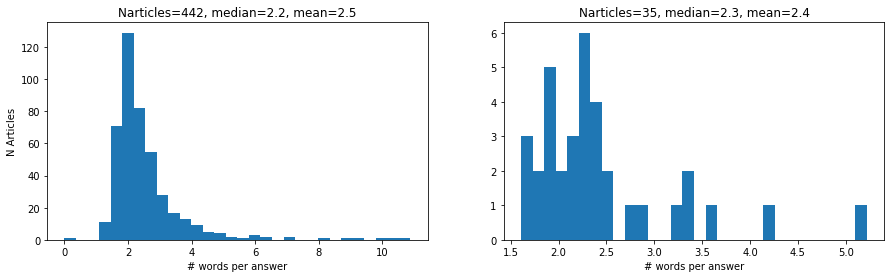

In [11]:
myvar = a_wordsperanswer
varname = '# words per answer'

# Plot bargraph
plotbar_train_dev(myvar,Ntrain,Ndev,varname,xlabel='Article #')


# Plot histogram
plothist_train_dev(myvar,Ntrain,Ndev,varname,ylabel='N Articles')

## Investigate articles with zero answers

From figure above, looks like there are some articles near the end that have zero associated answers. See what's going on there

In [181]:
# a = art[Ntrain-4]
# pquestions = [q['question'] for p in a['paragraphs'] for q in p['qas']]
# qanswers = [a['text'] for p in a['paragraphs'] for q in p['qas'] for a in q['answers']]
# qisimpossible = [q['is_impossible'] for p in a['paragraphs'] for q in p['qas']]
# qanswers = [a['text'] for p in a['paragraphs'] for q in p['qas'] for a in q['answers']]
# print(qisimpossible)

# a = art[Ntrain-3]
# pquestions = [q['question'] for p in a['paragraphs'] for q in p['qas']]
# qanswers = [a['text'] for p in a['paragraphs'] for q in p['qas'] for a in q['answers']]
# qisimpossible = [q['is_impossible'] for p in a['paragraphs'] for q in p['qas']]
# qanswers = [a['text'] for p in a['paragraphs'] for q in p['qas'] for a in q['answers']]
# print(qisimpossible)

# a = art[Ntrain-2]
# qisimpossible = [q['is_impossible'] for p in a['paragraphs'] for q in p['qas']]
# print(qisimpossible)

# a = art[Ntrain-1]
# qisimpossible = [q['is_impossible'] for p in a['paragraphs'] for q in p['qas']]
# print(qisimpossible)

# a = art[Ntrain-0]
# qisimpossible = [q['is_impossible'] for p in a['paragraphs'] for q in p['qas']]
# print(qisimpossible)

In [168]:
arts[0]['paragraphs'][0]['qas'][0]['is_impossible']

False

## Fraction of questions that are impossible

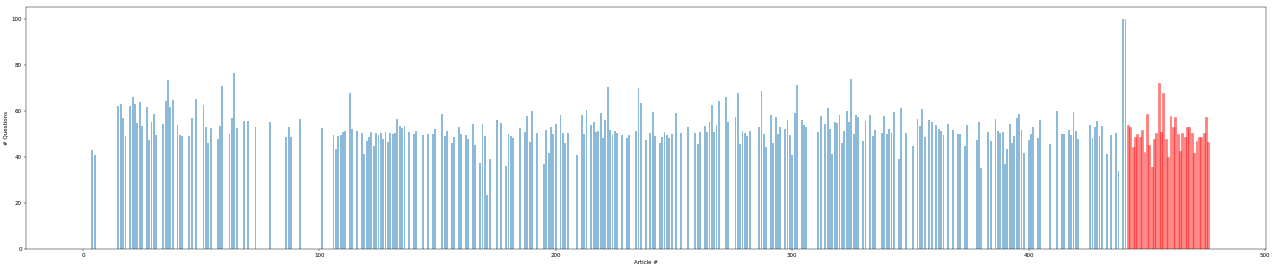

In [15]:
# [q['is_impossible'] for a in art for p in a['paragraphs']]
# arts[0]['paragraphs'][0]['qas'][0]['is_impossible']

aquestions = []
aisimpossible = []
aimpquestionsratio = []
for a in art:
    pquestions = [len(p['qas']) for p in a['paragraphs']]
    pisimpossible = [q['is_impossible'] for p in a['paragraphs'] for q in p['qas']]
    aquestions.append(sum(pquestions))
    aisimpossible.append(sum(pisimpossible))
    aimpquestionsratio.append(sum(pisimpossible)/sum(pquestions)*100)


figure(num=None, figsize=(15, 4),facecolor='w', edgecolor='k')
barlist = plt.bar(range(len(aimpquestionsratio)), aimpquestionsratio, align='center', alpha=0.5)
plt.xlabel('Article #')
plt.ylabel('# Questions')
for i in range(Ntrain,Ntrain+Ndev):
    barlist[i].set_color('r')
plt.show()

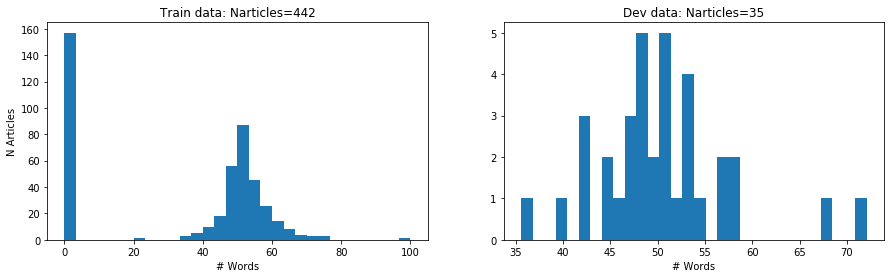

In [16]:
# figure(num=None, figsize=(15, 4), dpi=80, facecolor='w', edgecolor='k')
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False,figsize=(15, 4));
ax1.hist(aimpquestionsratio[0:Ntrain-1], bins=30);  # arguments are passed to np.histogram
ax1.set_title("Train data: Narticles=" + str(Ntrain));
ax1.set_ylabel('N Articles');
ax1.set_xlabel('# Words');

ax2.hist(aimpquestionsratio[Ntrain:], bins=30);  # arguments are passed to np.histogram
ax2.set_title("Dev data: Narticles=" + str(Ndev));
ax2.set_xlabel('# Words');

Seems like a few articles near the end contain 100% unanswerable questions. Also, a large number of articles contain 100% answerable questions. The rest are a mix of about 50/50

# Answers verbatim in text

## Run the analysis

## Test that blanks are properly indi

In [52]:
p = art2[0]['paragraphs'][0]
c = p['context']
cs = c.split()
bc = p['blank_classification']
for i in range(len(bc)):
    if bc[i]:
        print('Blank at word #' + str(i) + ' ' + cs[i])
print( p['context'])
print( p['context_blanked'])



TypeError: list indices must be integers or slices, not str

In [93]:
print(context_split)


['______', 'is', 'an', '______', 'sensation', 'in', 'which', 'a', 'listener', 'assigns', 'musical', 'tones', 'to', 'relative', 'positions', 'on', 'a', 'musical', 'scale', 'based', 'primarily', 'on', 'their', 'perception', 'of', 'the', '______', 'of', 'vibration.', '______', 'is', 'closely', 'related', 'to', 'frequency,', 'but', 'the', 'two', 'are', 'not', 'equivalent.', '______', 'is', 'an', 'objective,', 'scientific', 'attribute', 'that', 'can', 'be', 'measured.', '______', 'is', 'each', "person's", 'subjective', 'perception', 'of', 'a', 'sound,', 'which', 'cannot', 'be', 'directly', 'measured.', 'However,', 'this', 'does', 'not', 'necessarily', 'mean', 'that', 'most', 'people', "won't", 'agree', 'on', 'which', 'notes', 'are', 'higher', 'and', 'lower.']


In [67]:


temp = 'ASDFASfdsf'
temp.lower()

'asdfasfdsf'

In [22]:
a = ['lets','walk','the','dog']
b = ['dog']

b in a


False

In [21]:
a = 'lets walk the dog'
b = 'dog'

b in a

True

In [ ]:
# Gather all questions together

answers = []
all_questions = [qa['question'] for a in art for p in a['paragraphs'] for qa in p['qas'] for a in qa['answers']]
all_answers = [a['text'] for a in art for p in a['paragraphs'] for qa in p['qas'] for a in qa['answers']]
answer_is_verbatim_in_context = [a['text'] in p['context'] for a in art for p in a['paragraphs'] for qa in p['qas'] for a in qa['answers']]


answers_per_article[for a in art for p in a['paragraphs'] for ]

print('Num answers: ' + str(len(all_answers)))
print('Num true bools: ' + str(sum(answer_is_verbatim_in_context)))

In [ ]:
# Find all answers less than 3 words in duration. These are ideal candidates for fill in the blank questions
a=all_answers[0]
Nmax=3
answer_is_short = [len(a.split()) <= Nmax for a in all_answers]


In [ ]:
# Count number of trues
print('Num answers: ' + str(len(all_answers)))
print('Num true bools: ' + str(sum(answer_is_short)))
print('Percent: ' + str(sum(answer_is_short)/len(all_answers)*100))


In [ ]:
# Display all all answers and their validity
for q,a, context_bool in zip(all_questions,all_answers,answer_is_short):
    print(f"{a}\t\t{context_bool}")

In [ ]:
# Display all question-answer pairs and their validity
for q,a, context_bool in zip(all_questions,all_answers,answer_is_short):
    print(f"{q}\t{a}\t{context_bool}")

In [ ]:


unique_answers = set(all_answers)


print('All answers: ' + str(len(all_answers)))
print('Unique answers: ' + str(len(unique_answers)))


In [ ]:
unique_answers

In [ ]:


text = [p['context'] for a in art for p in a['paragraphs']]
text = ' '.join(text[:])

text


# Analyze poorly performing NER

In [ ]:

# This article on music, NER performs poorly; fails to capture key concepts
art = arts[105:107]         # A few short articles

# Might need to use word2vec or other embedding as additional features





In [115]:
# List all answers associatd with a specific question
ind_art = Ntrain-0
Nq = len(art[ind_art]['paragraphs'][0]['qas'])
for i in range(Nq):
    print(art[ind_art]['paragraphs'][0]['qas'][i]['answers'])
    


[{'text': 'France', 'answer_start': 159}, {'text': 'France', 'answer_start': 159}, {'text': 'France', 'answer_start': 159}, {'text': 'France', 'answer_start': 159}]
[{'text': '10th and 11th centuries', 'answer_start': 94}, {'text': 'in the 10th and 11th centuries', 'answer_start': 87}, {'text': '10th and 11th centuries', 'answer_start': 94}, {'text': '10th and 11th centuries', 'answer_start': 94}]
[{'text': 'Denmark, Iceland and Norway', 'answer_start': 256}, {'text': 'Denmark, Iceland and Norway', 'answer_start': 256}, {'text': 'Denmark, Iceland and Norway', 'answer_start': 256}, {'text': 'Denmark, Iceland and Norway', 'answer_start': 256}]
[{'text': 'Rollo', 'answer_start': 308}, {'text': 'Rollo', 'answer_start': 308}, {'text': 'Rollo', 'answer_start': 308}, {'text': 'Rollo', 'answer_start': 308}]
[{'text': '10th century', 'answer_start': 671}, {'text': 'the first half of the 10th century', 'answer_start': 649}, {'text': '10th', 'answer_start': 671}, {'text': '10th', 'answer_start': 

In [117]:
i=0
art[ind_art]['paragraphs'][0]['qas'][i]['answers'][0]

{'text': 'France', 'answer_start': 159}